In [41]:
import MDAnalysis 
import numpy as np
from MDAnalysis.lib.NeighborSearch import AtomNeighborSearch 
from ClusterEnsemble import ClusterEnsemble
import matplotlib 
import matplotlib.pyplot as plt

In [35]:
class TempClass(ClusterEnsemble):
    def return_cluster_list(self):
        return self.cluster_list

xtc = "files/npt.xtc"
tpr = "files/npt.tpr"

ClstrEns = TempClass(tpr, xtc, ["CE", "CM"])
ClstrEns.cluster_analysis()

type(ClstrEns)


Frame at time        0 ps has 102 clusters with                   55, 7, 15, 1, 28, 8, 18, 5, 17, 18, 1, 7, 13, 9, 7, 9, 3, 5, 3, 10, 7, 6, 27, 2, 11, 38, 1, 6, 1, 2, 1, 3, 3, 15, 11, 2, 2, 13, 6, 6, 3, 12, 22, 6, 17, 4, 11, 8, 8, 3, 7, 17, 7, 9, 10, 2, 2, 1, 1, 5, 2, 9, 3, 1, 7, 2, 1, 2, 7, 2, 6, 3, 1, 4, 2, 1, 1, 1, 2, 1, 1, 5, 1, 1, 1, 1, 2, 5, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1 surfactants
Frame at time       50 ps has 104 clusters with                   55, 7, 15, 1, 28, 8, 19, 5, 17, 18, 1, 7, 13, 9, 29, 9, 3, 5, 3, 10, 7, 6, 27, 2, 11, 38, 6, 1, 1, 1, 3, 3, 15, 11, 2, 2, 13, 6, 6, 3, 12, 5, 17, 4, 11, 8, 8, 3, 7, 17, 7, 9, 10, 2, 1, 2, 1, 1, 5, 2, 9, 5, 1, 7, 2, 1, 2, 7, 2, 6, 3, 1, 4, 1, 1, 1, 1, 2, 1, 1, 5, 1, 1, 1, 1, 1, 1, 5, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 surfactants
Frame at time      100 ps has 101 clusters with                   55, 7, 15, 1, 28, 8, 18, 5, 17, 18, 3, 7, 13, 9, 29, 9, 3, 5, 3, 10, 7, 6, 27, 2, 11, 39, 1, 6, 1, 2, 1, 3, 3, 15, 11, 2, 

__main__.TempClass

In [36]:
cluster_list = ClstrEns.return_cluster_list()

In [263]:
def plot_histogram(ax, cluster_list, frames=[(0, 1, 1)], maxbins=False, density=True *args, **kwargs):
    """Function to plot histograms for different timeframes
    
    """
    def _get_cluster_sizes(cluster_list, frames):
        cluster_sizes = []
        for cluster in cluster_list[slice(*frames)]:
            cluster_sizes += [len(seti) for seti in cluster]
        return cluster_sizes
        
    masterlist = []
    
    for frame in frames:
        masterlist.append(_get_cluster_sizes(cluster_list, frame))

    #@Todo if frame outside of scope, give warning 
    if maxbins == True:
        bins = max([max(item) for item in masterlist])
    #print(bins)
    ax.hist(masterlist, density=density *args, **kwargs)

NameError: name 'args' is not defined

('b', 'i', 'n', 's', '=', 'b', 'i', 'n', 's')


TypeError: hist() got multiple values for argument 'histtype'

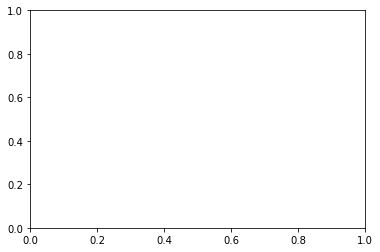

In [265]:
fig, ax = plt.subplots()

frames = [(11, 20, 1), (11, 20, 1)]
plot_histogram(ax, cluster_list, frames=frames, maxbins=True, histtype='histtype')
#plot_histogram(ax2, cluster_list, frames=(11, 20, 1))

TypeError: type object argument after * must be an iterable, not int

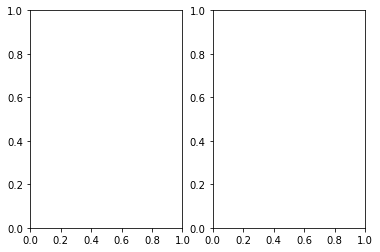

In [205]:
fig, (ax,ax2) = plt.subplots(1,2)

plot_histogram(ax, cluster_list, frames=(0, 10, 1))
plot_histogram(ax2, cluster_list, frames=(11, 20, 1))